In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PES - Inteligencia Artificial/02 - Aprendizado de máquina não-supervisionado/Projeto/data/covid_cities_features.csv')
df

,city,state,total_cases,mean_cases,std_cases,total_deaths,mean_deaths,std_deaths,days_recorded,death_rate,mean_daily_growth,days_until_first_case
0,Abadia de Goiás,GO,1351.0,558.153664,426.181817,28,7.565012,7.530658,423,0.020725,3.193853,55
1,Abadia dos Dourados,MG,375.0,118.761229,119.465862,14,2.687943,4.138253,423,0.037333,0.886525,42
2,Abadiânia,GO,400.0,147.659574,105.898626,27,10.801418,8.029761,423,0.067500,0.945626,63
3,Abaetetuba,PA,7659.0,3646.444444,2098.725146,210,104.628842,48.581654,423,0.027419,18.106383,4
4,Abaeté,MG,1019.0,248.574468,312.806079,26,5.224586,6.855251,423,0.025515,2.408983,16
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,Áurea,RS,202.0,53.307329,58.444733,3,0.754137,1.095478,423,0.014851,0.477541,51
5566,Ângulo,PR,283.0,88.886525,90.399673,6,1.465721,1.509255,423,0.021201,0.669031,60
5567,Érico Cardoso,BA,235.0,60.338061,81.674372,2,0.846336,0.955170,423,0.008511,0.555556,75
5568,Óbidos,PA,6049.0,2496.177305,1930.441608,112,42.179669,32.105806,423,0.018515,14.300236,19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   5570 non-null   object 
 1   state                  5570 non-null   object 
 2   total_cases            5570 non-null   float64
 3   mean_cases             5570 non-null   float64
 4   std_cases              5570 non-null   float64
 5   total_deaths           5570 non-null   int64  
 6   mean_deaths            5570 non-null   float64
 7   std_deaths             5570 non-null   float64
 8   days_recorded          5570 non-null   int64  
 9   death_rate             5570 non-null   float64
 10  mean_daily_growth      5570 non-null   float64
 11  days_until_first_case  5570 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 522.3+ KB


In [4]:
# Separar os valor X para atributos do tipo numerico
X_num = df.select_dtypes(include=['int64', 'float64'])

In [5]:
# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

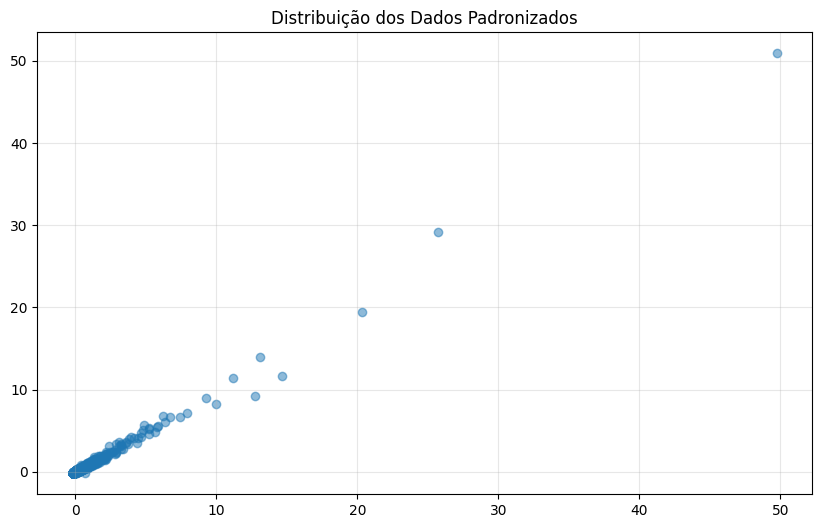

In [6]:
# plot X_scaled
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.title('Distribuição dos Dados Padronizados')
plt.grid(True, alpha=0.3)
plt.show()


# PCA

In [7]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Dimensão dos dados originais:", X_scaled.shape)
print("Dimensão dos dados transformados:", X_pca.shape)


Dimensão dos dados originais: (5570, 10)
Dimensão dos dados transformados: (5570, 3)


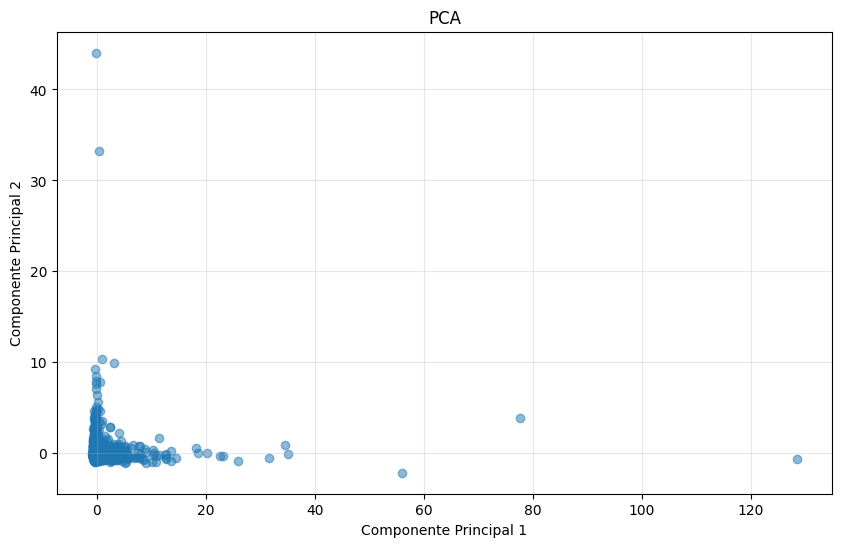

In [8]:
# plot do PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# Análise dos componentes
print(f"Variância explicada: {pca.explained_variance_ratio_}")
print(f"Variância total explicada: {sum(pca.explained_variance_ratio_):.2%}")
print(f"Número de componentes selecionados: {pca.n_components_}")

Variância explicada: [0.74423449 0.11144235 0.10779223]
Variância total explicada: 96.35%
Número de componentes selecionados: 3


Variância explicada em resumo é quanta informação cada componente do PCA conseguiu capturar. No nosso experimento a Variância total explicada obteve um valor de 96.35%, indicando forte correlação entre as variáveis originais.

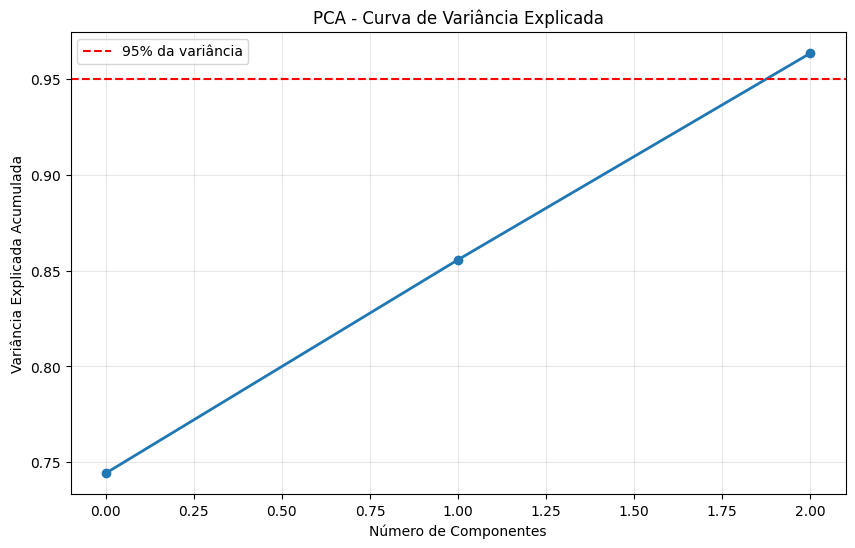

In [10]:
# Plot da variância
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2)
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Curva de Variância Explicada')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da variância')
plt.legend()
plt.show()

# t-SNE

In [11]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

print("Dimensão dos dados originais:", X_scaled.shape)
print("Dimensão dos dados transformados:", X_tsne.shape)

Dimensão dos dados originais: (5570, 10)
Dimensão dos dados transformados: (5570, 2)


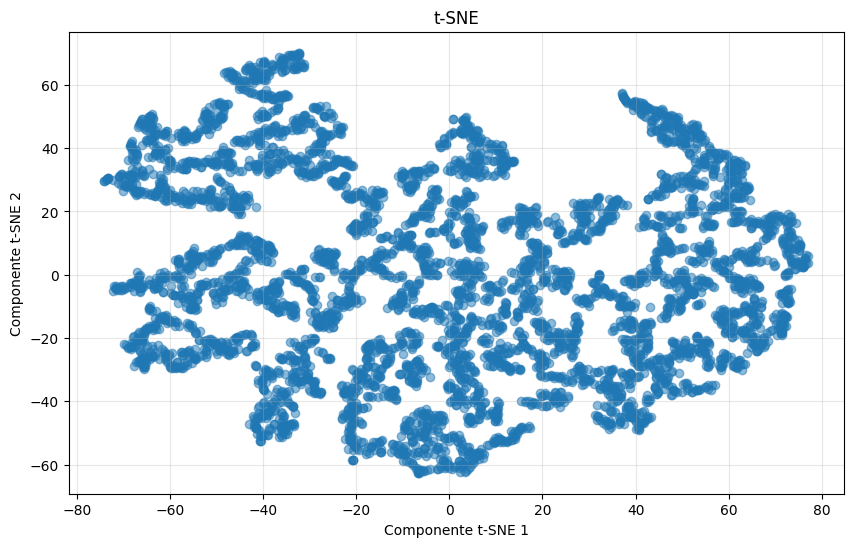

In [12]:
# plot t-sne
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('t-SNE')
plt.grid(True, alpha=0.3)
plt.show()

# UMAP

In [13]:
#Para visualização
umap_model = umap.UMAP(n_components=2, n_neighbors=15,random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
print("Dimensão dos dados originais:", X_scaled.shape)
print("Dimensão dos dados transformados:", X_umap.shape)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dimensão dos dados originais: (5570, 10)
Dimensão dos dados transformados: (5570, 2)


In [14]:
#Para pre-processamento
umap_model2 = umap.UMAP(n_components=10, n_neighbors=30,random_state=42)
X_umap = umap_model2.fit_transform(X_scaled)
print("Dimensão dos dados originais:", X_scaled.shape)
print("Dimensão dos dados transformados:", X_umap.shape)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dimensão dos dados originais: (5570, 10)
Dimensão dos dados transformados: (5570, 10)


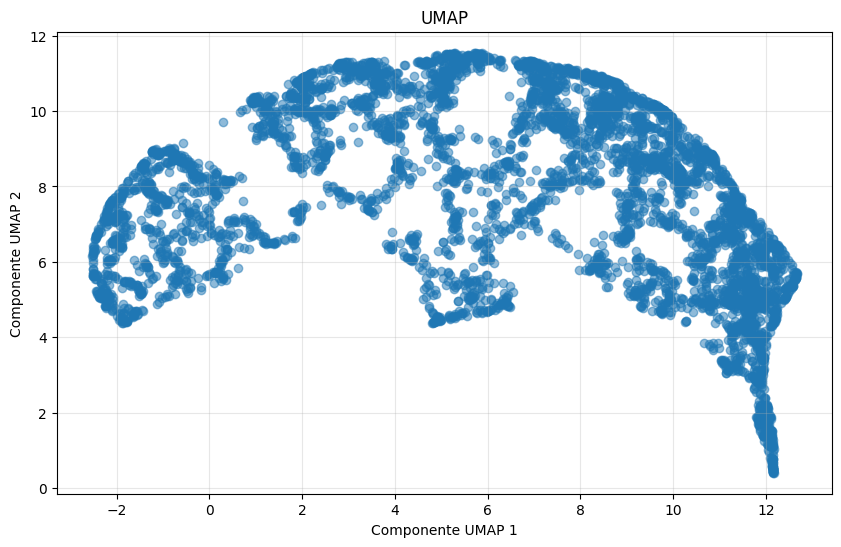

In [15]:
# plot UMAP
plt.figure(figsize=(10,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.title('UMAP')
plt.grid(True, alpha=0.3)
plt.show()

# K-MEANS

In [16]:
#kmeans com pca
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_k = kmeans.fit_predict(X_pca)


In [17]:
# Obter os centróides finais e os rótulos dos clusters
final_centroids = kmeans.cluster_centers_
final_labels = kmeans.labels_

print("Coordenadas dos Centróides Finais:")
print(final_centroids)

Coordenadas dos Centróides Finais:
[[-4.24098461e-01  3.96409615e-02  8.99993001e-01]
 [ 1.55950458e-01 -2.90401374e-02 -6.62038810e-01]
 [ 3.30265965e+01  1.13326409e-01  1.15004688e+00]
 [ 1.28409364e+02 -6.92640346e-01  8.68268757e+00]]


In [18]:
# Avaliação
score = silhouette_score(X_pca, clusters_k)
score

np.float64(0.35693913022571033)

0.357: Indica que há alguma estrutura, mas com sobreposição entre clusters. 0.357 é moderado e aceitável

In [19]:
#kmeans com t-sne
kmeans2 = KMeans(n_clusters=4, random_state =42)
clusters_k2 = kmeans2.fit_predict(X_tsne)

#Avaliação
score2 = silhouette_score(X_tsne, clusters_k2)
score2


np.float32(0.38974506)

valor mais alto mas não performa bem para clustering

In [20]:
#kmeans com UMAP
kmeans3 = KMeans(n_clusters=4, random_state =42)
clusters_k3 = kmeans3.fit_predict(X_umap)

#Avaliação
score3 = silhouette_score(X_umap, clusters_k3)
score

np.float64(0.35693913022571033)

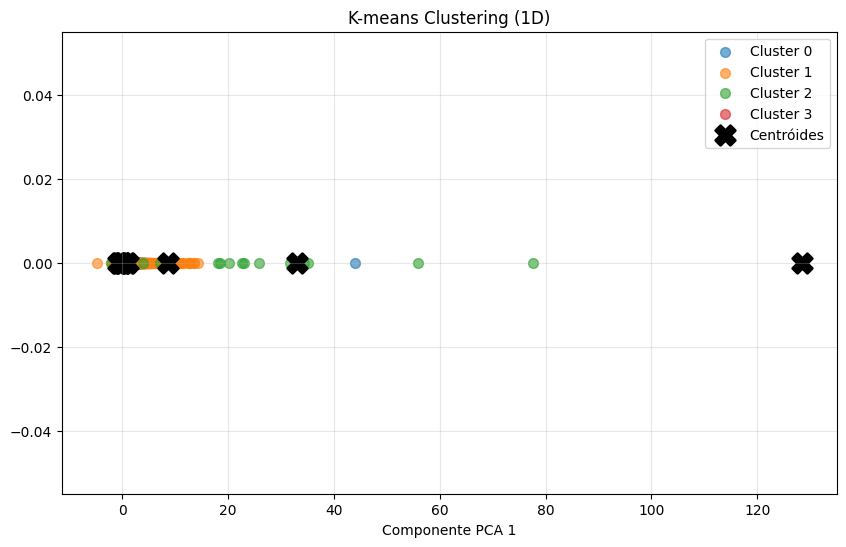

In [22]:
# Se seus dados são 1D
plt.figure(figsize=(10, 6))

# Plotar pontos coloridos por cluster
for i in range(4):
    cluster_points = X_pca[clusters_k == i]
    plt.scatter(cluster_points, np.zeros_like(cluster_points),
                label=f'Cluster {i}', alpha=0.6, s=50)

# Plotar centróides
plt.scatter(final_centroids, np.zeros_like(final_centroids),
            c='black', marker='X', s=200, label='Centróides', linewidths=2)

plt.xlabel('Componente PCA 1')
plt.title('K-means Clustering (1D)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# HAC

In [23]:
hac = AgglomerativeClustering(n_clusters=4)
clusters_h = hac.fit_predict(X_pca)

df['cluster_hac'] = clusters_h

# DBSCAN

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=20)
clusters_d = dbscan.fit_predict(X_pca)

df['cluster_dbscan'] = clusters_d